The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').
Preparing the dataset

Use only the following columns:

    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'

EDA

    Look at the fuel_efficiency_mpg variable. Does it have a long tail?


In [ ]:
import pandas as pd

df = pd.read_csv('car_fuel_efficiency.csv')
df.head()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [47]:
small_df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
small_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


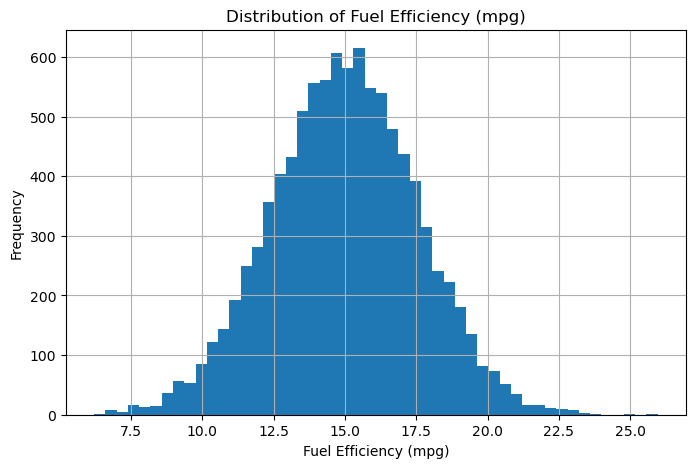

Skewness: -0.01
No, the distribution does not have a pronounced long tail.


In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
small_df['fuel_efficiency_mpg'].hist(bins=50)
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Efficiency (mpg)')
plt.show()

# Check skewness
skewness = small_df['fuel_efficiency_mpg'].skew()
print(f"Skewness: {skewness:.2f}")

if skewness > 1:
    print("Yes, the distribution has a long right tail (positively skewed).")
elif skewness < -1:
    print("Yes, the distribution has a long left tail (negatively skewed).")
else:
    print("No, the distribution does not have a pronounced long tail.")

Question 1

There's one column with missing values. What is it?

    'engine_displacement'
    'horsepower'
    'vehicle_weight'
    'model_year'


In [6]:
# Check which column in small_df has missing values
missing_counts = small_df.isnull().sum()
missing_column = missing_counts[missing_counts > 0].index.tolist()
print("Column(s) with missing values:", missing_column)

Column(s) with missing values: ['horsepower']


Question 2

What's the median (50% percentile) for variable 'horsepower'?

    49
    99
    149
    199



In [7]:
median_horsepower = small_df['horsepower'].median()
print(f"Median horsepower: {median_horsepower:.0f}")

Median horsepower: 149


Prepare and split the dataset

    Shuffle the dataset (the filtered one you created above), use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [93]:
import numpy as np
np.random.seed(42)
n = len(small_df)
print(n)
idx = np.arange(n)

np.random.shuffle(idx)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test
print(n_val, n_test, n_train)



shuffled_df = small_df.iloc[idx]
df_train = shuffled_df.iloc[:n_train]
df_val = shuffled_df.iloc[n_train:n_train + n_val]
df_test = shuffled_df.iloc[n_train + n_val:]


print(f"Train set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

9704
1940 1940 5824
Train set size: 5824
Validation set size: 1940
Test set size: 1940


Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?

Options:

    With 0
    With mean
    Both are equally good


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import numpy as np

# Option 1: Fill missing 'horsepower' with 0
train_0 = df_train.copy()
val_0 = df_val.copy()
train_0['horsepower'] = train_0['horsepower'].fillna(0)
val_0['horsepower'] = val_0['horsepower'].fillna(0)

features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

lr_0 = LinearRegression()
lr_0.fit(train_0[features], train_0[target])
val_pred_0 = lr_0.predict(val_0[features])
rmse_0 = root_mean_squared_error(val_0[target], val_pred_0)

# Option 2: Fill missing 'horsepower' with mean (from train only)
hp_mean = df_train['horsepower'].mean()
train_mean = df_train.copy()
val_mean = df_val.copy()
train_mean['horsepower'] = train_mean['horsepower'].fillna(hp_mean)
val_mean['horsepower'] = val_mean['horsepower'].fillna(hp_mean)

lr_mean = LinearRegression()
lr_mean.fit(train_mean[features], train_mean[target])
val_pred_mean = lr_mean.predict(val_mean[features])
rmse_mean = root_mean_squared_error(val_mean[target], val_pred_mean)

print("RMSE (fill with 0):", round(rmse_0, 2))
print("RMSE (fill with mean):", round(rmse_mean, 2))

if rmse_0 < rmse_mean:
    print("Filling with 0 gives better RMSE.")
elif rmse_mean < rmse_0:
    print("Filling with mean gives better RMSE.")
else:
    print("Both options give the same RMSE.")

RMSE (fill with 0): 0.52
RMSE (fill with mean): 0.46
Filling with mean gives better RMSE.


Question 4

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

Options:

    0
    0.01
    1
    10
    100


In [95]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]



r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

X_train = train_0[features]
y_train = train_0[target]
X_val = val_0[features]
y_val = val_0[target]

for r in r_values:
    w0,w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_train.dot(w)
    rmse = root_mean_squared_error(y_val, val_pred)
    print('val', rmse)
    
    val_pred = w0 + X_val.dot(w)
    
    
    varrr = [round(rmse, 2), r]
    rmse_scores.append(varrr)
    if(rmse<0.53):
        print(r,round(rmse, 2))

best_rmse = min(rmse_scores)
best_r_indices = [i for i, score in enumerate(rmse_scores) if score == best_rmse]
best_r = r_values[min(best_r_indices)]

print("RMSE scores:", dict(zip(r_values, rmse_scores)))
print("Best r:", best_r)


val 3.5824935241899696
val 0.5173782638831882
0.01 0.52
val 0.5171115525771552
0.1 0.52
val 0.5187525130701618
1 0.52
val 0.5222348802092982
5 0.52
val 0.5228916092823513
10 0.52
val 0.5229812979636571
100 0.52
RMSE scores: {0: [3.58, 0], 0.01: [0.52, 0.01], 0.1: [0.52, 0.1], 1: [0.52, 1], 5: [0.52, 5], 10: [0.52, 10], 100: [0.52, 100]}
Best r: 0.01


Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

    0.001
    0.006
    0.060
    0.600


In [96]:


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]



In [ ]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []


for seed in seeds:
    print("Seed:", seed)
    np.random.seed(seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()



    

    train_0 = df_train.copy()
    val_0 = df_val.copy()
    train_0['horsepower'] = train_0['horsepower'].fillna(0)
    val_0['horsepower'] = val_0['horsepower'].fillna(0)
    
    X_train = train_0[features]
    y_train = train_0[target]
    X_val = val_0[features]
    y_val = val_0[target]
    
    w0,w = train_linear_regression(X_train, y_train)
    val_pred = w0 + X_val.dot(w)
    rmse = root_mean_squared_error(y_val, val_pred)
    rmse_list.append(rmse)

std = round(np.std(rmse_list), 3)
print("Standard deviation of RMSE scores:", std)

Seed: 0
Seed: 1
Seed: 2
Seed: 3
Seed: 4
Seed: 5
Seed: 6
Seed: 7
Seed: 8
Seed: 9
Standard deviation of RMSE scores: 0.007


Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

    0.15
    0.515
    5.15
    51.5


In [99]:
# Split the dataset with seed 9
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Combine train and validation datasets
train_val = pd.concat([df_train, df_val]).reset_index(drop=True)

# Fill missing values with 0
train_val_0 = train_val.copy()
test_0 = df_test.copy()
train_val_0['horsepower'] = train_val_0['horsepower'].fillna(0)
test_0['horsepower'] = test_0['horsepower'].fillna(0)

# Train Ridge model with r=0.001
w0,w = train_linear_regression_reg(train_val_0[features], train_val_0[target], 0.001)

# Predict and calculate RMSE on test set
test_pred =  w0 + (test_0[features]).dot(w)
test_rmse = root_mean_squared_error(test_0[target], test_pred)
print("Test RMSE (r=0.001, fill 0):", round(test_rmse, 3))

Test RMSE (r=0.001, fill 0): 0.516
